# Calculating Betas Using Pandas DataFrames

## 1. Import Libraries and Dependencies

In [174]:
# Import necessary libraries and dependencies
import pandas as pd 
import pathlib as Path
import seaborn as sns 
%matplotlib inline 

## 2. Create a Path to the File Using Pathlib.

In [175]:
# Set the file paths for the CSVs using the Path class from the pathlib library
msft_csv_path = (r"C:\Users\minha\OneDrive\Documents\ASU_2022_Bootcamp\Activity_Files\04-Pandas\2\Activities\12-beta-01\Resources\MSFT.csv")
sp500_csv_path = (r"C:\Users\minha\OneDrive\Documents\ASU_2022_Bootcamp\Activity_Files\04-Pandas\2\Activities\12-beta-01\Resources\SP500.csv")

## 3. Read the CSV into a Pandas DataFrame.

In [176]:
# Read the daily closing prices of MSFT, set the `date` as a datetime index
msft_df = pd.read_csv(msft_csv_path)
sp500_df = pd.read_csv(sp500_csv_path)

# set 'date' to index 
msft_df.set_index(pd.to_datetime(msft_df['date'], infer_datetime_format = True), inplace = True)
sp500_df.set_index(pd.to_datetime(sp500_df['date'], infer_datetime_format = True), inplace = True)

## 4. Combine DataFrames and Sort the Index

In [177]:
# Use the concat function to combine the DataFrames by column and perform an inner join. 
combined_data_frames = pd.concat([msft_df, sp500_df], axis = 'columns', join = 'inner')

# Sort datetime index in ascending order (past to present)
combined_data_frames.sort_index(ascending = True, inplace = True)

# Display a few rows
combined_data_frames.head(10)

,date,close,volume,open,high,low,date,close
date,,,,,,,,
2014-05-20,5/20/14,39.68,21318920,39.68,39.94,39.4600,5/20/14,1872.829956
2014-05-21,5/21/14,40.35,22377460,39.80,40.35,39.7399,5/21/14,1888.030029
2014-05-22,5/22/14,40.10,20201010,40.29,40.35,39.8500,5/22/14,1892.489990
2014-05-23,5/23/14,40.12,18013300,40.37,40.37,40.0000,5/23/14,1900.530029
2014-05-27,5/27/14,40.19,26160450,40.26,40.26,39.8100,5/27/14,1911.910034
2014-05-28,5/28/14,40.01,25711440,40.14,40.19,39.8200,5/28/14,1909.780029
2014-05-29,5/29/14,40.34,19887140,40.15,40.35,39.9100,5/29/14,1920.030029
2014-05-30,5/30/14,40.94,34564370,40.45,40.97,40.2500,5/30/14,1923.569946
2014-06-02,6/2/14,40.79,18493950,40.95,41.09,40.6800,6/2/14,1924.969971


## 5. Drop Extraneous Columns

In [178]:
# Drop extra columns and only leave the close columns and associated values
combined_data_frames.drop(['date', 'volume', 'open', 'high', 'low'], axis = 'columns', inplace = True)
combined_data_frames.head()

,close,close
date,,
2014-05-20,39.68,1872.829956
2014-05-21,40.35,1888.030029
2014-05-22,40.10,1892.489990
2014-05-23,40.12,1900.530029
2014-05-27,40.19,1911.910034


## 6. Rename Columns

In [179]:
# Rename the columns to match the corresponding stock
combined_data_frames.columns = ['MSFT', 'SP500']
combined_data_frames.head()

,MSFT,SP500
date,,
2014-05-20,39.68,1872.829956
2014-05-21,40.35,1888.030029
2014-05-22,40.10,1892.489990
2014-05-23,40.12,1900.530029
2014-05-27,40.19,1911.910034


## 7. Calculate Daily Returns

In [180]:
# Use the `pct_change` function to calculate daily returns of closing prices for each column
daily_returns = combined_data_frames.pct_change()
daily_returns = daily_returns.dropna()
daily_returns

,MSFT,SP500
date,,
2014-05-21,0.016885,0.008116
2014-05-22,-0.006196,0.002362
2014-05-23,0.000499,0.004248
2014-05-27,0.001745,0.005988
2014-05-28,-0.004479,-0.001114
...,...,...
2019-05-13,-0.029733,-0.024131
2019-05-14,0.011188,0.008016
2019-05-15,0.010342,0.005839


## 8. Calculate Covariance of MSFT returns vs. S&P 500 returns

In [181]:
# Calculate covariance of all daily returns of MSFT vs. S&P 500
daily_returns_covariance = combined_data_frames['MSFT'].cov(combined_data_frames['SP500'])
daily_returns_covariance

7574.622705730457

## 9. Calculate Variance of SP500 Returns

In [182]:
# Calculate variance of the S&P 500
daily_returns_variance = combined_data_frames['SP500'].var()
daily_returns_variance

102061.54492165314

## 10. Calculate Beta of MSFT

In [183]:
# Calculate beta of all daily returns of MSFT
daily_returns_beta = daily_returns_covariance / daily_returns_variance
daily_returns_beta

0.07421622621473214

## 11. Calculate 30-Day Rolling Covariance of MSFT Returns vs. S&P 500 Returns

<AxesSubplot:title={'center':'Rolling 30-Day Covariance of MSFT Returns vs. S&P 500 Returns'}, xlabel='date'>

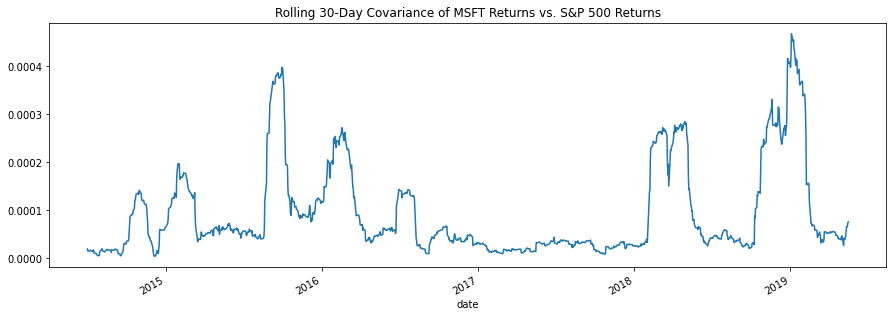

In [184]:
# Calculate 30-day rolling covariance of MSFT vs. S&P 500 and plot the data
rolling_covariance = daily_returns['MSFT'].rolling(window = 30).cov(daily_returns['SP500'])
rolling_covariance.plot(title = 'Rolling 30-Day Covariance of MSFT Returns vs. S&P 500 Returns', figsize = (15, 5))

## 12. Calculate 30-Day Rolling Variance of S&P 500 Returns

<AxesSubplot:title={'center':'30-day rolling variance of MSFT vs. S&P 500'}, xlabel='date'>

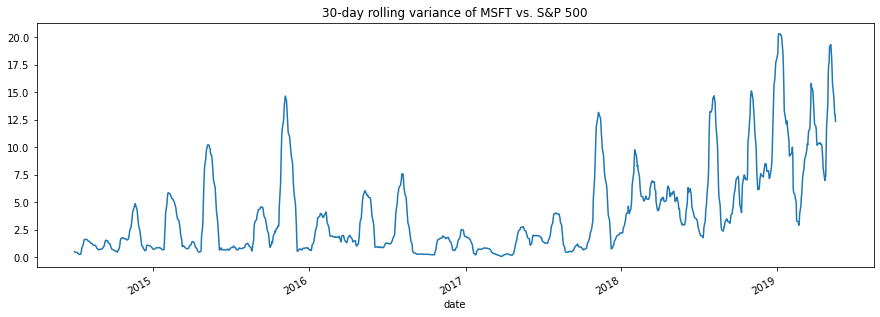

In [185]:
# Calculate 30-day rolling variance of MSFT vs. S&P 500 and plot the data
rolling_variance = combined_data_frames['MSFT'].rolling(window = 30).var()

rolling_variance.plot(title = '30-day rolling variance of MSFT vs. S&P 500', figsize = (15, 5))

## 13. Calculate 30-Day Rolling Beta of MSFT

<AxesSubplot:title={'center':'Rolling 30-Day Beta of MSFT'}, xlabel='date'>

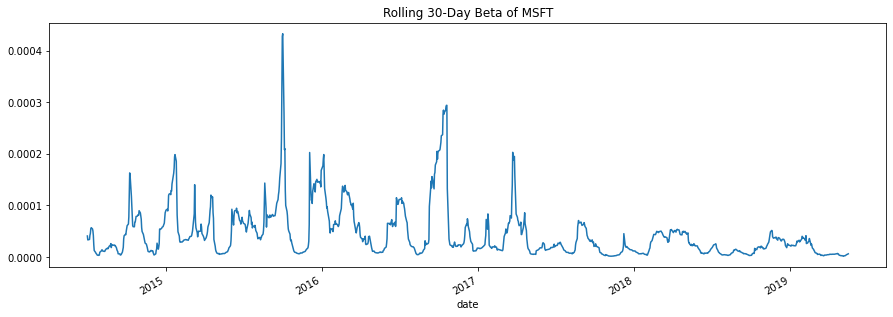

In [186]:
# Calculate 30-day rolling beta of MSFT and plot the data
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(title = 'Rolling 30-Day Beta of MSFT', figsize=(15, 5))

## 14. Beta vs. Correlation

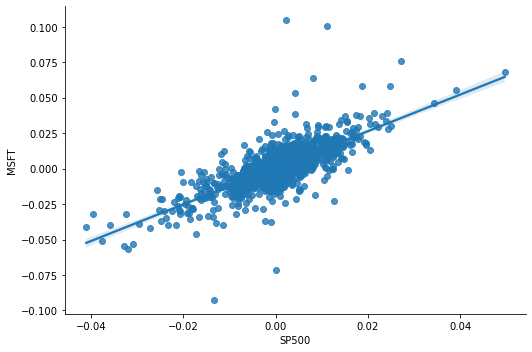

In [187]:
# Showcase beta vs. correlation by plotting a scatterplot using the seaborn library and fitting a regression line
sns.lmplot(x = 'SP500', y = 'MSFT', data = daily_returns, aspect = 1.5, fit_reg = True)